#**Predicting the Diabetes disease using Binary Classification**

###Comparing KNN and Decision Tree

*   KNN






In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/diabetes_classification.csv')

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [ ]:
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset['Outcome'].values

print(x[:5])


[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 24)

print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [ ]:
#normalisation and converting as array
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train[:5]

array([[-0.86696549,  0.65451528,  0.26268516,  0.06600566, -0.17592153,
        -0.79362511, -0.64314075, -1.05262908],
       [-1.16456508, -0.42131253, -0.06446436, -0.06157575, -0.70063962,
        -0.64670301,  0.90063933, -0.10580088],
       [-0.56936589,  1.63812928,  1.02603402, -1.33738975, -0.70063962,
        -1.23439139, -0.43962925, -0.96655379],
       [ 1.81143087,  0.10123241,  0.04458548,  0.32116846,  0.288583  ,
        -0.13915396, -0.79141342,  0.66887674],
       [-0.2717663 ,  0.31639797,  0.58983467, -1.33738975, -0.70063962,
         0.30161232, -0.21867391,  0.92710261]])

In [ ]:
#modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

neigh = KNeighborsClassifier()

neigh.fit(x_train, y_train)

#prediction

y_hat = neigh.predict(x_test)

#evaluation

print('The accuracy is;', (accuracy_score(y_test, y_hat))*100)
print('The confusion matrix is:', confusion_matrix(y_test, y_hat))
print('The classification report is:', classification_report)

The accuracy is; 69.79166666666666
The confusion matrix is: [[100  24]
 [ 34  34]]
The classification report is: <function classification_report at 0x7acfec0b1b40>


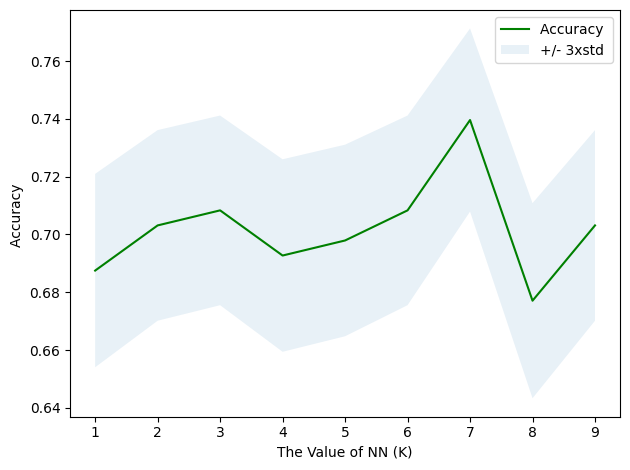



The best accuracy was with 0.7395833333333334 with k= 7


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =10 #the range of K
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): #for loop

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

###Decision Tree: Evaluate using all features as predictors

In [ ]:
# taking all features to predict the outcome
import pandas as pd

dataset = pd.read_csv('/content/diabetes_classification.csv')

dataset2 = dataset.copy()

dataset2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x1 = dataset2.iloc[:,:-1].values
y1 = dataset2['Outcome'].values
print(x[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [ ]:
dataset2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

label = LabelEncoder()

x1[0]= label.fit_transform(x1[0])
x1[:,1]= label.fit_transform(x1[:,1])
x1[:,2]= label.fit_transform(x1[:,2])
x1[:,3]= label.fit_transform(x1[:,3])
x1[:,4]= label.fit_transform(x1[:,4])
x1[:,5]= label.fit_transform(x1[:,5])
x1[:,6]= label.fit_transform(x1[:,6])
x1[:,7]= label.fit_transform(x1[:,7])


In [ ]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split (x1,y1, test_size = 0.1, random_state=24)

x1.shape

(768, 8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#training
DTS1 = DecisionTreeClassifier()
DTS1.fit(x1_train, y1_train)

#prediction
y_hat1 = DTS1.predict(x1_test)

#evaluation
print('The accuracy is:', (accuracy_score(y1_test, y_hat1))*100)
print('The confusion matrix is:', confusion_matrix(y1_test, y_hat1))
print('The classification report is:', classification_report(y1_test, y_hat1))


The accuracy is: 67.53246753246754
The confusion matrix is: [[38 10]
 [15 14]]
The classification report is:               precision    recall  f1-score   support

           0       0.72      0.79      0.75        48
           1       0.58      0.48      0.53        29

    accuracy                           0.68        77
   macro avg       0.65      0.64      0.64        77
weighted avg       0.67      0.68      0.67        77



###DecisionTree: Evaluate using all features as predictors except Skin Thickness and Age

In [ ]:
dataset3 = dataset2.copy()

dataset3 = dataset3.drop('SkinThickness', axis = 1)
dataset3 = dataset3.drop('Age', axis = 1)

dataset3.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,0,33.6,0.627,1
1,1,85,66,0,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,94,28.1,0.167,0
4,0,137,40,168,43.1,2.288,1


In [ ]:

x3 = dataset3.iloc[:,:-1].values
y3 = dataset3['Outcome'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

x3_train, x3_test, y3_train, y3_test = train_test_split (x3,y3, test_size = 0.2, random_state = 24)

label = LabelEncoder()

x3[0]= label.fit_transform(x3[0])
x3[:,1]= label.fit_transform(x3[:,1])
x3[:,2]= label.fit_transform(x3[:,2])
x3[:,3]= label.fit_transform(x3[:,3])
x3[:,4]= label.fit_transform(x3[:,4])
x3[:,5]= label.fit_transform(x3[:,5])


In [ ]:
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split (x3, y3, test_size = 0.2, random_state = 24)

print(x3_train.shape)
print(x3_test.shape)

(614, 6)
(154, 6)


In [ ]:
#modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#training

DTC = DecisionTreeClassifier()
DTC.fit(x3_train, y3_train)

#prediction

y_hat3 = DTC.predict(x3_test)

#evaluation

print('The accuracy score is', (accuracy_score(y3_test, y_hat3))*100)
print('The confusion matrix', confusion_matrix(y3_test, y_hat3))
print('Classification report:', classification_report(y3_test, y_hat3))

The accuracy score is 72.07792207792207
The confusion matrix [[82 16]
 [27 29]]
Classification report:               precision    recall  f1-score   support

           0       0.75      0.84      0.79        98
           1       0.64      0.52      0.57        56

    accuracy                           0.72       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154

